In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 981 kB 65.1 MB/s 
     |████████████████████████████████| 263 kB 70.5 MB/s 
     |████████████████████████████████| 3.8 MB 56.8 MB/s 
     |████████████████████████████████| 1.3 MB 59.8 MB/s 
     |████████████████████████████████| 468 kB 66.5 MB/s 
     |████████████████████████████████| 880 kB 59.8 MB/s 
     |████████████████████████████████| 182 kB 60.8 MB/s 
     |████████████████████████████████| 7.6 MB 50.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.10-py3-none-any.whl size=25312982 sha256=be9d47bfec0d70018e0773748dcec752c9c5bbdc53e74dbafecad55fc1e03228
  Stored in directory: /root/.cache/pip/wheels/9c/1c/1b/6df2db85720b8f5c6ea5e3ae37313cfc656f248abf910b7cfd
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=708246a8c176174b24225db

In [ ]:
import ktrain
from ktrain import vision as vis
import urllib.request
import zipfile

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = "/content/drive/MyDrive/RISET/data_banjir_rob"

In [ ]:
data_aug = vis.get_data_aug( rescale = 1./255,
                             horizontal_flip=True)

(train_data, val_data, preproc) = vis.images_from_folder(
                                              datadir=DATA_DIR,
                                              data_aug = data_aug,
                                              train_test_names=['train', 'val'], 
                                              target_size=(224, 224), color_mode='rgb')

Found 642 images belonging to 2 classes.
Found 642 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


In [ ]:
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
model = vis.image_classifier('pretrained_resnet50', train_data, val_data)
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=True, batch_size=32)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94765736/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner.freeze(freeze_range=90)

In [ ]:
learner.print_layers()

0 (trainable=False) : <keras.engine.input_layer.InputLayer object at 0x7f94c2b52e50>
1 (trainable=False) : <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f94b06192d0>
2 (trainable=False) : <keras.layers.convolutional.conv2d.Conv2D object at 0x7f94b0619a90>
3 (trainable=False) : <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f94b0619150>
4 (trainable=False) : <keras.layers.core.activation.Activation object at 0x7f9422d74390>
5 (trainable=False) : <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f93ffb8ecd0>
6 (trainable=False) : <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f9422e99290>
7 (trainable=False) : <keras.layers.convolutional.conv2d.Conv2D object at 0x7f94b0638610>
8 (trainable=False) : <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f94b0638e10>
9 (trainable=False) : <keras.layers.core.activation.Activation object at 0x7f9400f8ac10>
10 (trainable=False) : <kera

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/ktrain/core.py:610: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  "max_epochs is being set to 5 since steps per epoch is small. "


Epoch 1/5
20/20 [==============================] - 42s 1s/step - loss: 1.6415 - accuracy: 0.5197
Epoch 2/5
20/20 [==============================] - 10s 296ms/step - loss: 1.5595 - accuracy: 0.5459
Epoch 3/5
20/20 [==============================] - 10s 316ms/step - loss: 2.0752 - accuracy: 0.6443
Epoch 4/5
20/20 [==============================] - 6s 105ms/step - loss: 24.0628 - accuracy: 0.5271


/usr/local/lib/python3.7/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


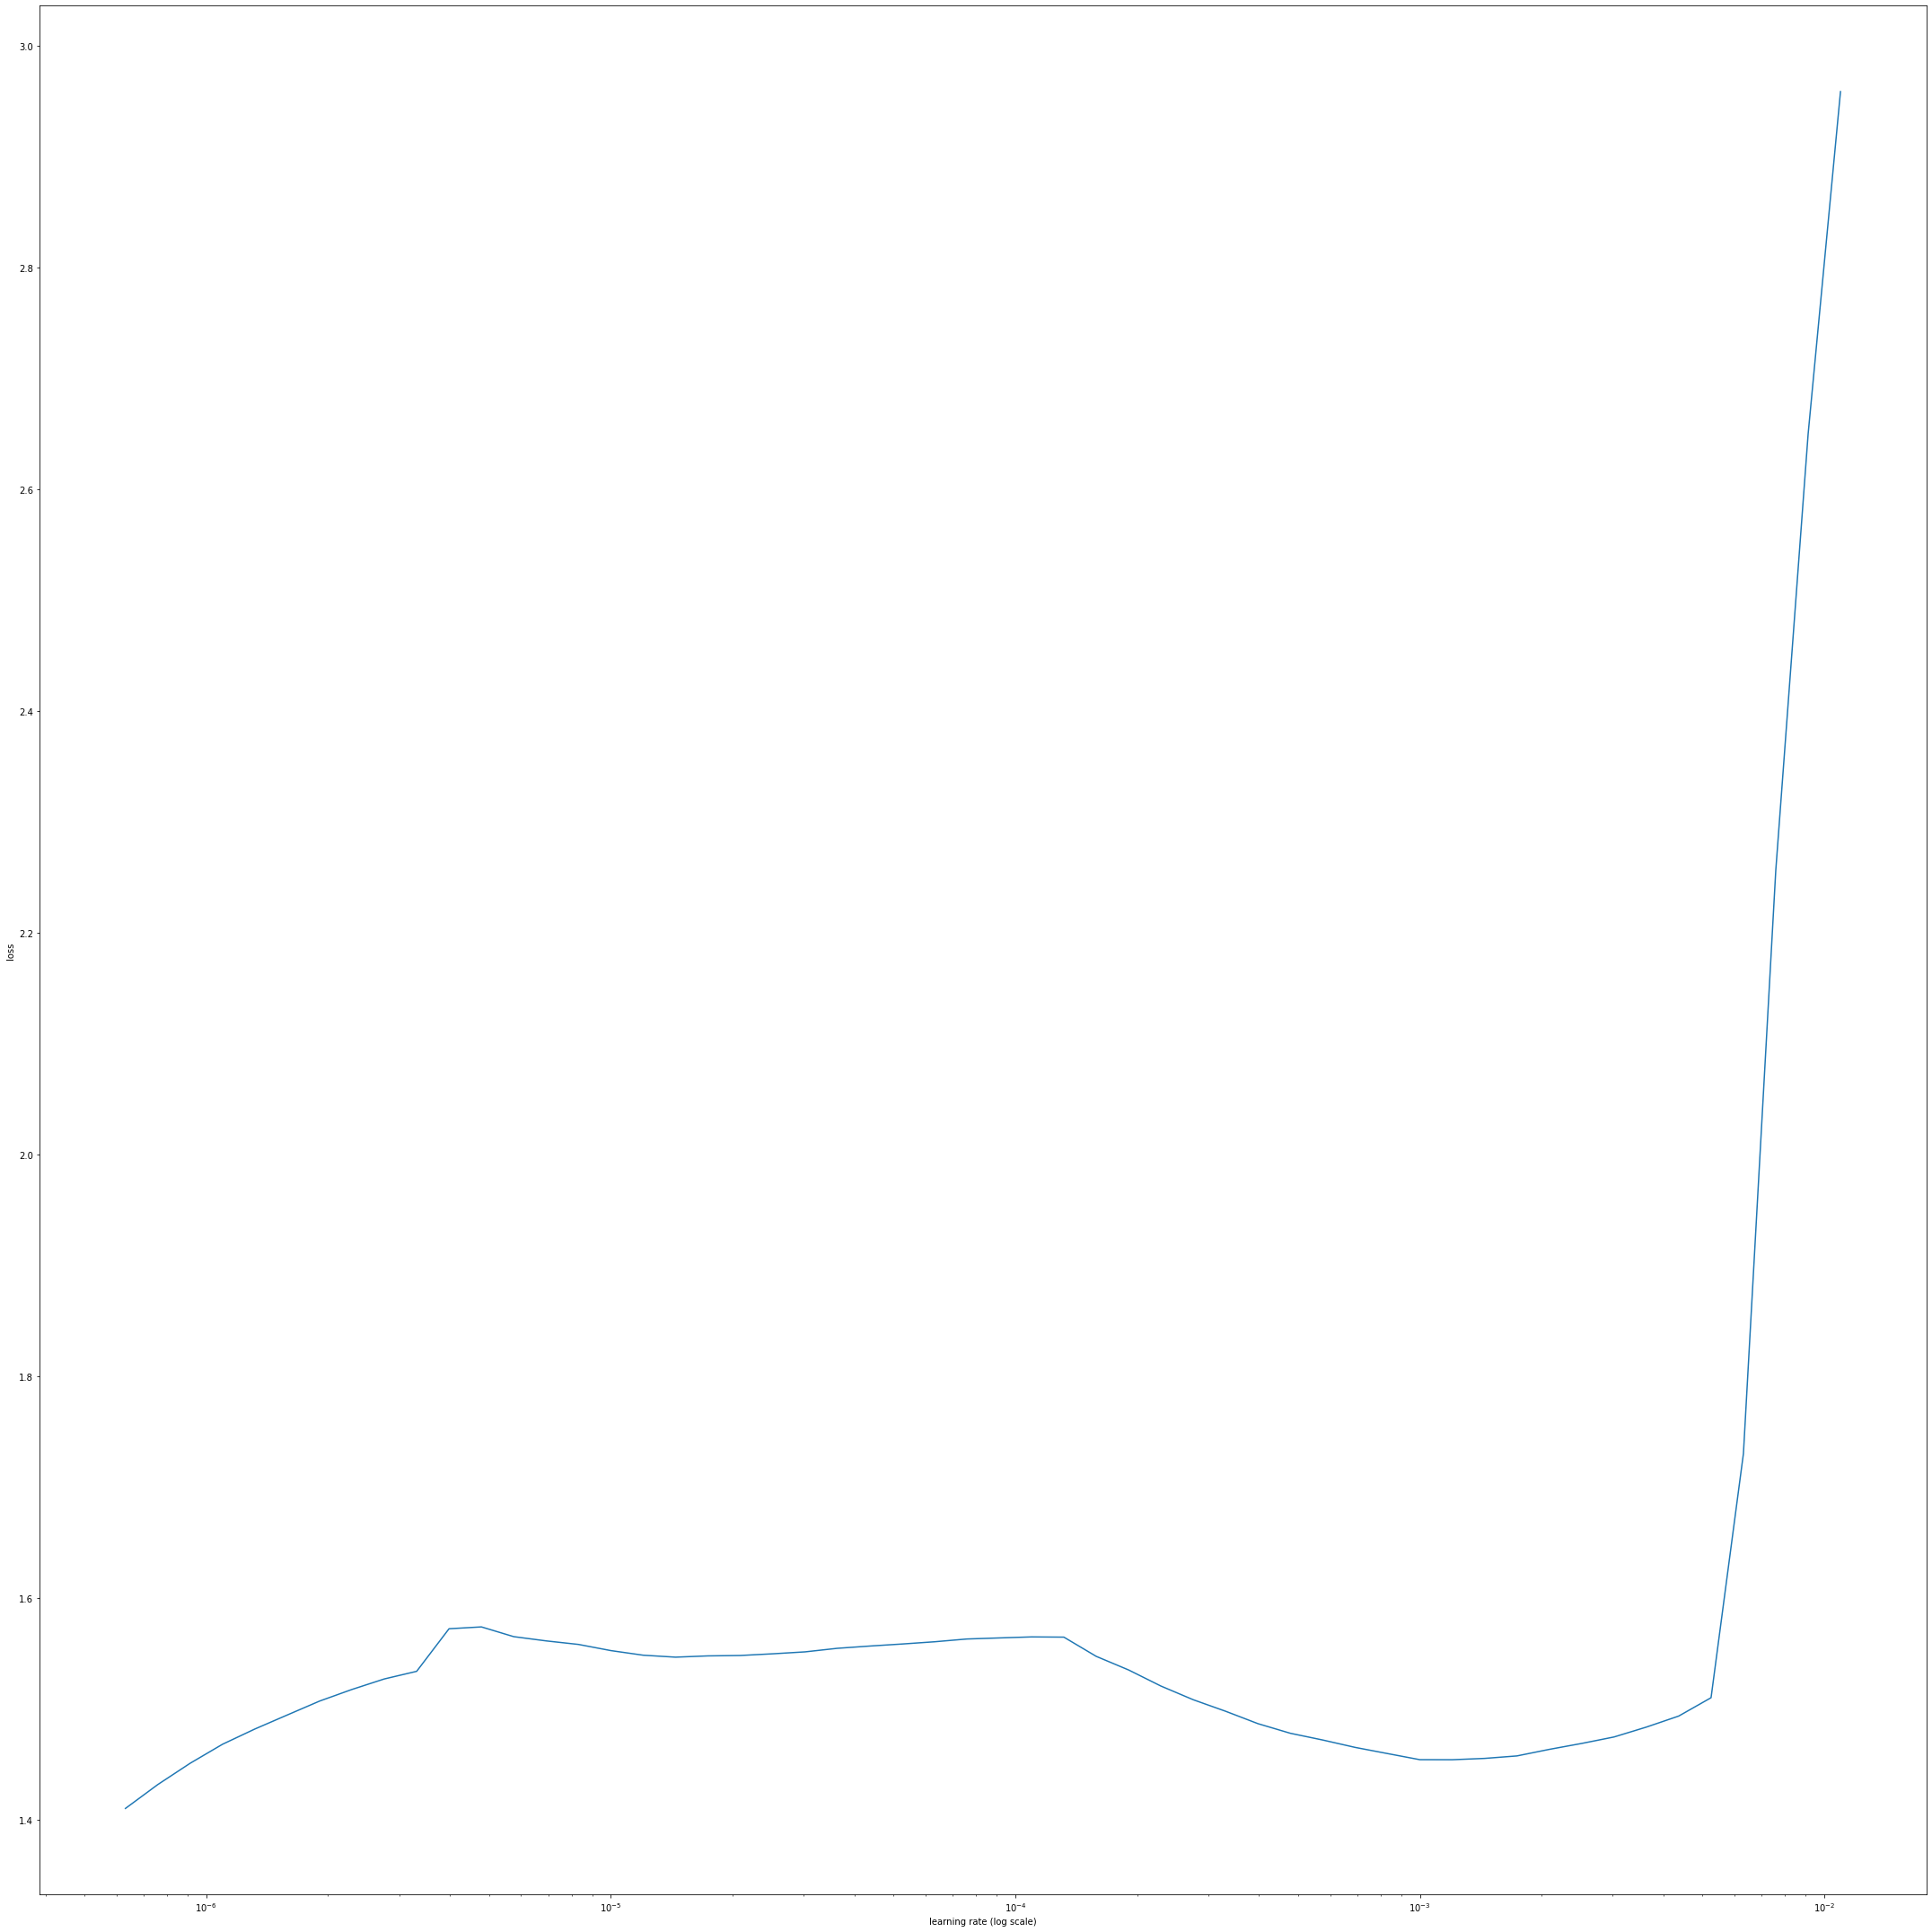

In [ ]:
learner.lr_plot()

In [ ]:
history = learner.autofit(1e-3,50).history



begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/50
21/21 [==============================] - 17s 661ms/step - loss: 1.6612 - accuracy: 0.8551 - val_loss: 98.4941 - val_accuracy: 0.7268
Epoch 2/50
21/21 [==============================] - 18s 687ms/step - loss: 0.6660 - accuracy: 0.8676 - val_loss: 37.7730 - val_accuracy: 0.7978
Epoch 3/50
21/21 [==============================] - 19s 688ms/step - loss: 0.5702 - accuracy: 0.8536 - val_loss: 10.8878 - val_accuracy: 0.8306
Epoch 4/50
21/21 [==============================] - 18s 691ms/step - loss: 0.6834 - accuracy: 0.8614 - val_loss: 1.0012 - val_accuracy: 0.8852
Epoch 5/50
21/21 [==============================] - 18s 636ms/step - loss: 0.3703 - accuracy: 0.8629 - val_loss: 0.4917 - val_accuracy: 0.8907
Epoch 6/50
21/21 [==============================] - 18s 685ms/step - loss: 0.3891 - accuracy: 0.8551 - val_loss: 0.4658 - val_accuracy: 0.8743
Epoch 7/50
21/21 [==============================] - 17s 618m

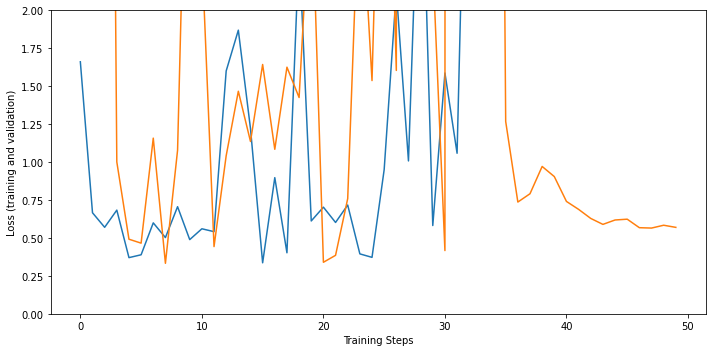

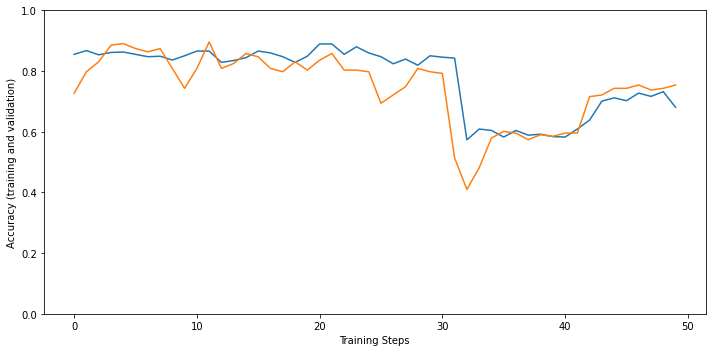

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history["loss"])
plt.plot(history["val_loss"])

plt.figure(figsize=(10, 5))
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])

In [ ]:
loss, acc = learner.model.evaluate_generator(learner.val_data, 
                                             steps=len(learner.val_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


In [ ]:
print('final loss:%s, final accuracy:%s' % (loss, acc))

final loss:438.403564453125, final accuracy:0.562841534614563


In [ ]:
print('final loss: 10.32039491283912, final accuracy:0.85829392381283')

final loss: 10.32039491283912, final accuracy:0.85829392381283


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.save('data/banjir_detector')

In [ ]:
predictor.predict_filename('/content/drive/MyDrive/RISET/test/Banjir/splitted_1003.jpeg')

['Kering']

In [ ]:
from tensorflow import keras
predictor = keras.models.load_model('/content/drive/MyDrive/RISET/model_rob.h5')

1/1 [==============================] - 0s 24ms/step
jumlah data yang di test: 55 , jumlah benar: 55 , akurasi yang diperoleh: 1.0


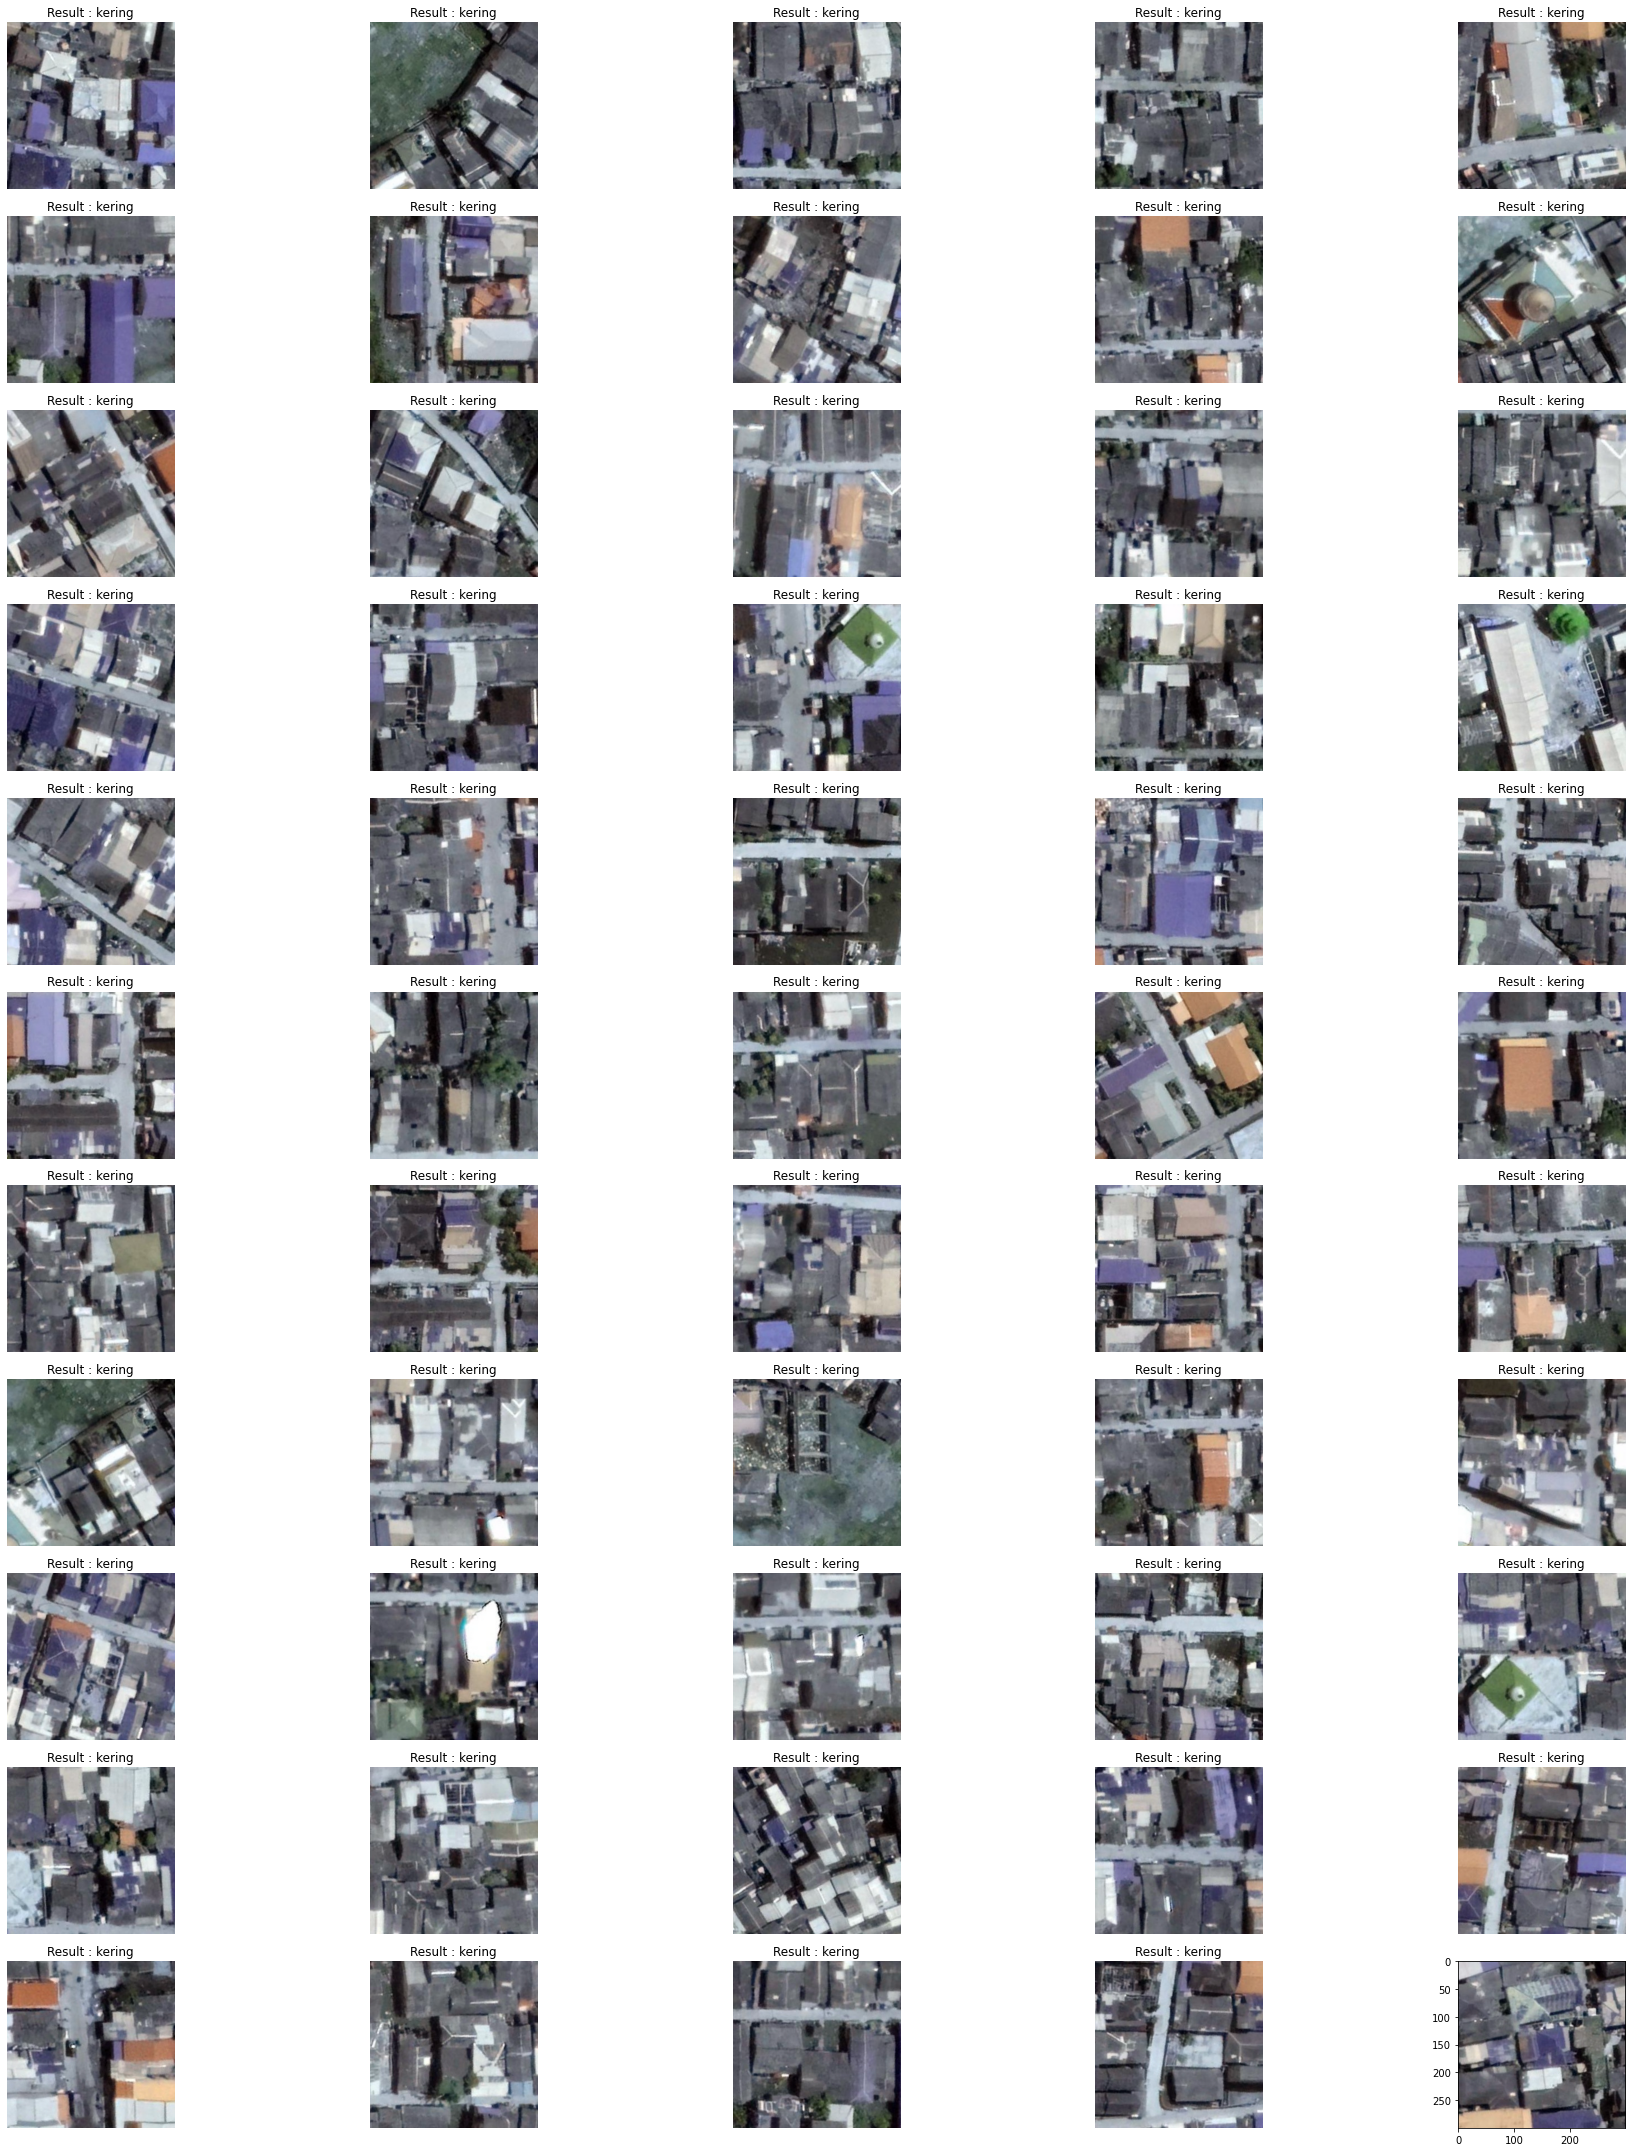

In [ ]:
import numpy as np
import os
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2
# from PIL import Image

expectation = 'kering'
# uploaded = files.upload()
path = '/content/drive/MyDrive/RISET/data_banjir_rob/test/Kering'
# path = '/content/drive/MyDrive/RISET/Dataset_SIBI_test/kata_mp/'

folderBesar = os.listdir(path)
num = 0
total = 0
arr = ["kering","banjir"]
# print(len(arr))
plt.rcParams["figure.figsize"] = [30.00,30]
plt.rcParams["figure.autolayout"] = True
for file in folderBesar:
  total +=1
  # predicting images
  # path = 
  img = cv2.imread(path+'/'+ file)
  img.resize(224,224,3)
  
  # print(path+file)
  # img_int8 = img.astype(np.uint8)
  # equ = cv2.equalizeHist(img_int8)
  # img = cv2.resize(img, (224, 224))
  # img = img.convert('L')
 
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = predictor.predict(images, batch_size=10)  
  result = np.argmax(classes)
  # print(fn)
  
  plt.axis('off')
  plt.title("Result : " + arr[result])
  plt.subplot(11, 5, num+1)
  plt.imshow(cv2.imread(path+'/'+ file))
  # print(result)
  # print(arr[result] , path+'/'+ file)
  if(arr[result] == expectation):
    num += 1

print("jumlah data yang di test: " + str(total) ,", jumlah benar: " + str(num) , ", akurasi yang diperoleh: " + str(num/total))

In [ ]:
predictor.predict_folder('/content/drive/MyDrive/RISET/test/Banjir')[:10]

AttributeError: ignored

In [ ]:
predictor.predict_folder('/content/drive/MyDrive/RISET/test/Kering')[:10]

Found 55 images belonging to 1 classes.


[('Kering/splitted_1013.jpeg', 'Kering'),
 ('Kering/splitted_105.jpeg', 'Kering'),
 ('Kering/splitted_1072.jpeg', 'Kering'),
 ('Kering/splitted_1077.jpeg', 'Kering'),
 ('Kering/splitted_108.jpeg', 'Kering'),
 ('Kering/splitted_109.jpeg', 'Kering'),
 ('Kering/splitted_1105.jpeg', 'Banjir'),
 ('Kering/splitted_116.jpeg', 'Kering'),
 ('Kering/splitted_12.jpeg', 'Kering'),
 ('Kering/splitted_1218.jpeg', 'Kering')]

In [ ]:
plot_1.set_xlabel("The predicted sign: "+predictor)

In [ ]:
# tampilakn 4 data subplot 1x4 matplotlib data tidak banjir

In [ ]:
# tampilkan 4 data subplot 1x4 matplotlib data banjir

In [ ]:
# tampilkan data besar

In [ ]:
# tampilakn accuracy, val_accuracy

In [ ]:
# tampilakn loss, val_loss

In [ ]:
# tampilkan confusion matrix